# Importations

In [1]:
from trading_lib.imports import *                    # pandas, numpy, etc.
from trading_lib.trading_environment import (
    DataManager,
    Optimizer,
    PerformanceAnalyzer,
    ReportManager,
    RiskManager,
    DATA_DIR,
    MAX_FILE_SIZE,
    REPORT_DIR
)
from trading_lib.strategies import (
    Benchmark,
    MovingAverageCrossStrategy,
    DcaStrategy,
    DonchianBreakoutStrategy,
    ADXTrendStrategy,
    ROCStrategy,
    MACDStrategy,
    BollingerMeanRevStrategy,
    RSIStrategy,
    PairTradingStrategy,
    VWAPStrategy
)

c:\Users\Lesins\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Strategies

In [2]:
# 1) Load data
dm = DataManager(data_dir=DATA_DIR, max_file_size=MAX_FILE_SIZE)
data = dm.load_data(
    symbols='^GSPC',
    period='2y',
    interval='1d'
)

In [3]:
strategies = [
    Benchmark,
    MovingAverageCrossStrategy, DcaStrategy, DonchianBreakoutStrategy,
    ADXTrendStrategy, ROCStrategy, MACDStrategy, BollingerMeanRevStrategy,
    RSIStrategy, PairTradingStrategy, VWAPStrategy
]

# run Bayesian optimisation on each and pick the best overall by Sharpe:
perf_df, equity_map, strategy_obj_map = Optimizer.find_best_strategy(
    strategies,
    data,
    method='bayes',
    metric='Total Return',  # 'Sharpe' or 'Total Return'
    n_trials=50,       # passed into optimize_bayesian
    seed=42
)

In [4]:
perf_df

,Total Return,Ann. Return,Ann. Vol,Sharpe,Max Drawdown,Win Rate,Profit Factor,Expectancy
strategy,,,,,,,,
DCA 1999.1826110967218@D,0.420293,0.192594,0.160871,1.175134,-0.189022,0.567729,1.249601,0.000736
Benchmark,0.412099,0.189135,0.161021,1.156140,-0.189022,0.567729,1.244490,0.000725
ROC 10,0.248528,0.117869,0.160756,0.774052,-0.181990,0.507968,1.159590,0.000350
BB Rev 45/2.2186290984573342,0.163809,0.079126,0.074638,1.055840,-0.017995,0.025896,4.301079,-0.006210
RSI 6,0.136428,0.066306,0.081944,0.822790,-0.061807,0.107570,1.562343,-0.003132
VWAP,0.114379,0.055869,0.161392,0.418822,-0.298945,0.559761,1.082360,0.000253
MACD 20/65/25,0.054592,0.027042,0.016628,1.613039,-0.006153,0.025896,5.067300,-0.002427
MA 85/130,0.047347,0.023494,0.026009,0.905597,0.000000,0.003984,NaN,0.000093
MA 50/170 + ADX,0.034608,0.017226,0.024520,0.708514,0.000000,0.001992,NaN,0.000069


In [5]:
best_sharp_strat_name = perf_df.sort_values(by='Sharpe', ascending=False).index[0]
best_sharp_strat = strategy_obj_map[best_sharp_strat_name]


best_pf_strat_name = perf_df.sort_values(by='Profit Factor', ascending=False).index[0]
best_pf_strat = strategy_obj_map[best_pf_strat_name]

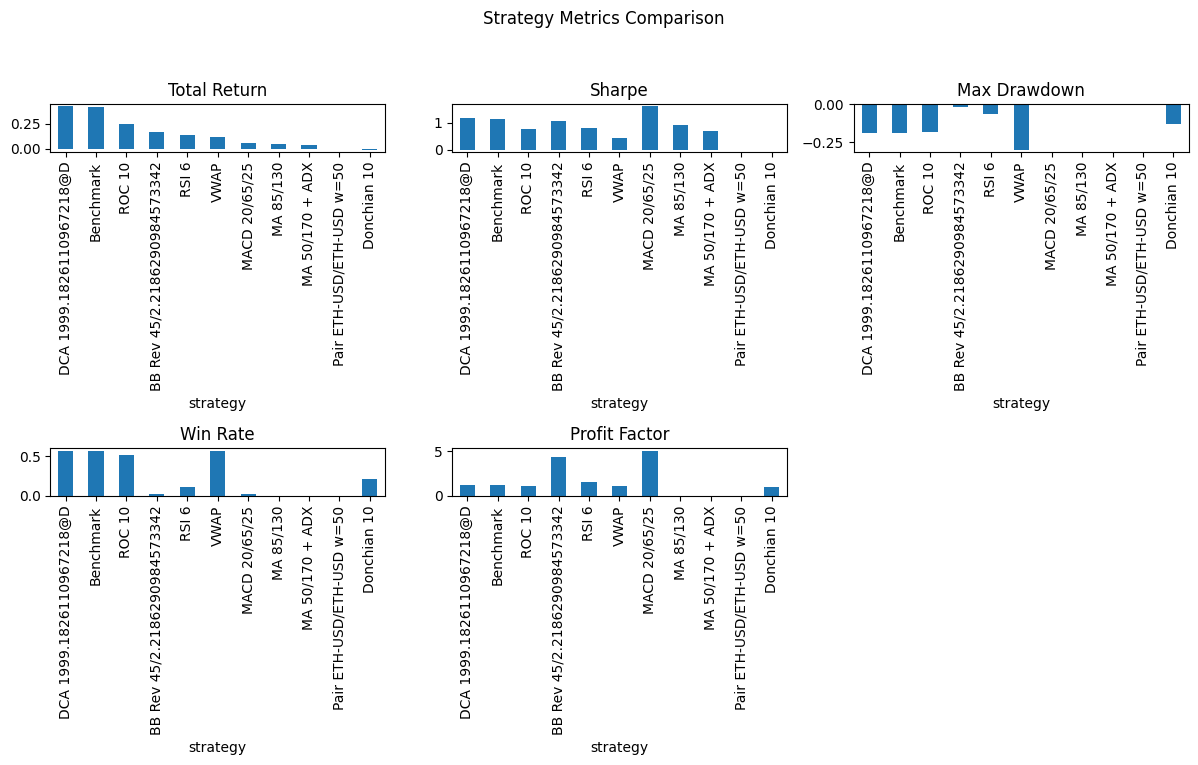

In [6]:
rm = ReportManager()
rm.plot_metrics(
    perf_df,
    metrics=['Total Return', 'Sharpe', 'Max Drawdown', 'Win Rate', 'Profit Factor']
)

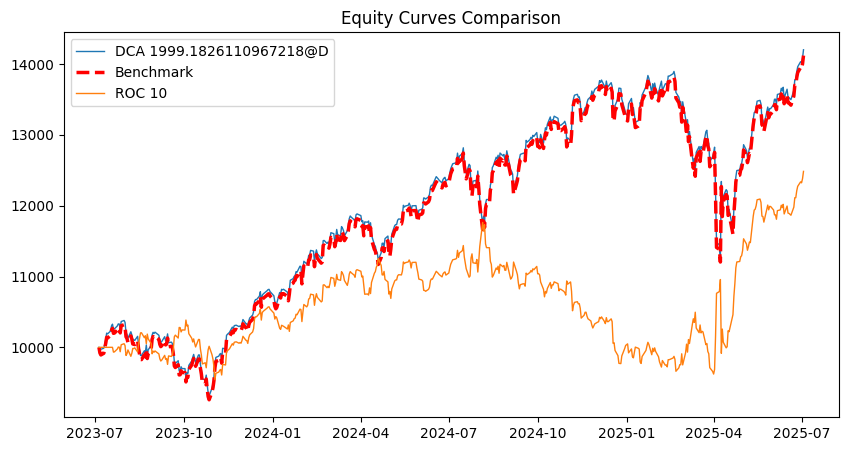

In [7]:
# Overlay equity curves
rm.plot_equity_curves(equity_map, perf_df=perf_df, top_n=3, top_n_metric='Total Return')

In [8]:
perf_df

,Total Return,Ann. Return,Ann. Vol,Sharpe,Max Drawdown,Win Rate,Profit Factor,Expectancy
strategy,,,,,,,,
DCA 1999.1826110967218@D,0.420293,0.192594,0.160871,1.175134,-0.189022,0.567729,1.249601,0.000736
Benchmark,0.412099,0.189135,0.161021,1.156140,-0.189022,0.567729,1.244490,0.000725
ROC 10,0.248528,0.117869,0.160756,0.774052,-0.181990,0.507968,1.159590,0.000350
BB Rev 45/2.2186290984573342,0.163809,0.079126,0.074638,1.055840,-0.017995,0.025896,4.301079,-0.006210
RSI 6,0.136428,0.066306,0.081944,0.822790,-0.061807,0.107570,1.562343,-0.003132
VWAP,0.114379,0.055869,0.161392,0.418822,-0.298945,0.559761,1.082360,0.000253
MACD 20/65/25,0.054592,0.027042,0.016628,1.613039,-0.006153,0.025896,5.067300,-0.002427
MA 85/130,0.047347,0.023494,0.026009,0.905597,0.000000,0.003984,NaN,0.000093
MA 50/170 + ADX,0.034608,0.017226,0.024520,0.708514,0.000000,0.001992,NaN,0.000069


In [9]:
best_sharp_strat_name = perf_df.sort_values(by='Sharpe', ascending=False).index[0]
print(f'Best Sharp Strategy:\t\t{best_sharp_strat_name}')
best_sharp_strat = strategy_obj_map[best_sharp_strat_name]


best_pf_strat_name = perf_df.sort_values(by='Profit Factor', ascending=False).index[0]
print(f'Best Profit Factor Strategy:\t{best_pf_strat_name}')
best_pf_strat = strategy_obj_map[best_pf_strat_name]

Best Sharp Strategy:		MACD 20/65/25
Best Profit Factor Strategy:	MACD 20/65/25


# END